In \[2\]:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.neighbors import KNeighborsClassifier

    from sklearn import metrics
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    import warnings
    warnings.simplefilter("ignore")
    import joblib

In \[3\]:

    data  = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In \[4\]:

    data.shape

Out\[4\]:

    (891, 12)

In \[5\]:

    data

Out\[5\]:

|     | PassengerId | Survived | Pclass | Name                                              | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Cabin | Embarked |
|-----|-------------|----------|--------|---------------------------------------------------|--------|------|-------|-------|------------------|---------|-------|----------|
| 0   | 1           | 0        | 3      | Braund, Mr. Owen Harris                           | male   | 22.0 | 1     | 0     | A/5 21171        | 7.2500  | NaN   | S        |
| 1   | 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | female | 38.0 | 1     | 0     | PC 17599         | 71.2833 | C85   | C        |
| 2   | 3           | 1        | 3      | Heikkinen, Miss. Laina                            | female | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250  | NaN   | S        |
| 3   | 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | female | 35.0 | 1     | 0     | 113803           | 53.1000 | C123  | S        |
| 4   | 5           | 0        | 3      | Allen, Mr. William Henry                          | male   | 35.0 | 0     | 0     | 373450           | 8.0500  | NaN   | S        |
| ... | ...         | ...      | ...    | ...                                               | ...    | ...  | ...   | ...   | ...              | ...     | ...   | ...      |
| 886 | 887         | 0        | 2      | Montvila, Rev. Juozas                             | male   | 27.0 | 0     | 0     | 211536           | 13.0000 | NaN   | S        |
| 887 | 888         | 1        | 1      | Graham, Miss. Margaret Edith                      | female | 19.0 | 0     | 0     | 112053           | 30.0000 | B42   | S        |
| 888 | 889         | 0        | 3      | Johnston, Miss. Catherine Helen "Carrie"          | female | NaN  | 1     | 2     | W./C. 6607       | 23.4500 | NaN   | S        |
| 889 | 890         | 1        | 1      | Behr, Mr. Karl Howell                             | male   | 26.0 | 0     | 0     | 111369           | 30.0000 | C148  | C        |
| 890 | 891         | 0        | 3      | Dooley, Mr. Patrick                               | male   | 32.0 | 0     | 0     | 370376           | 7.7500  | NaN   | Q        |

891 rows × 12 columns

# EDA<a href="#EDA" class="anchor-link">¶</a>

In \[6\]:

    data.columns

Out\[6\]:

    Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
           'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
          dtype='object')

In \[7\]:

    data.isnull().sum()

Out\[7\]:

    PassengerId      0
    Survived         0
    Pclass           0
    Name             0
    Sex              0
    Age            177
    SibSp            0
    Parch            0
    Ticket           0
    Fare             0
    Cabin          687
    Embarked         2
    dtype: int64

In \[8\]:

    data = data.drop("Cabin", axis=1)

In \[9\]:

    data

Out\[9\]:

|     | PassengerId | Survived | Pclass | Name                                              | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Embarked |
|-----|-------------|----------|--------|---------------------------------------------------|--------|------|-------|-------|------------------|---------|----------|
| 0   | 1           | 0        | 3      | Braund, Mr. Owen Harris                           | male   | 22.0 | 1     | 0     | A/5 21171        | 7.2500  | S        |
| 1   | 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | female | 38.0 | 1     | 0     | PC 17599         | 71.2833 | C        |
| 2   | 3           | 1        | 3      | Heikkinen, Miss. Laina                            | female | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250  | S        |
| 3   | 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | female | 35.0 | 1     | 0     | 113803           | 53.1000 | S        |
| 4   | 5           | 0        | 3      | Allen, Mr. William Henry                          | male   | 35.0 | 0     | 0     | 373450           | 8.0500  | S        |
| ... | ...         | ...      | ...    | ...                                               | ...    | ...  | ...   | ...   | ...              | ...     | ...      |
| 886 | 887         | 0        | 2      | Montvila, Rev. Juozas                             | male   | 27.0 | 0     | 0     | 211536           | 13.0000 | S        |
| 887 | 888         | 1        | 1      | Graham, Miss. Margaret Edith                      | female | 19.0 | 0     | 0     | 112053           | 30.0000 | S        |
| 888 | 889         | 0        | 3      | Johnston, Miss. Catherine Helen "Carrie"          | female | NaN  | 1     | 2     | W./C. 6607       | 23.4500 | S        |
| 889 | 890         | 1        | 1      | Behr, Mr. Karl Howell                             | male   | 26.0 | 0     | 0     | 111369           | 30.0000 | C        |
| 890 | 891         | 0        | 3      | Dooley, Mr. Patrick                               | male   | 32.0 | 0     | 0     | 370376           | 7.7500  | Q        |

891 rows × 11 columns

In \[10\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 891 entries, 0 to 890
    Data columns (total 11 columns):
     #   Column       Non-Null Count  Dtype  
    ---  ------       --------------  -----  
     0   PassengerId  891 non-null    int64  
     1   Survived     891 non-null    int64  
     2   Pclass       891 non-null    int64  
     3   Name         891 non-null    object 
     4   Sex          891 non-null    object 
     5   Age          714 non-null    float64
     6   SibSp        891 non-null    int64  
     7   Parch        891 non-null    int64  
     8   Ticket       891 non-null    object 
     9   Fare         891 non-null    float64
     10  Embarked     889 non-null    object 
    dtypes: float64(2), int64(5), object(4)
    memory usage: 76.7+ KB

In \[11\]:

    data.skew()

Out\[11\]:

    PassengerId    0.000000
    Survived       0.478523
    Pclass        -0.630548
    Age            0.389108
    SibSp          3.695352
    Parch          2.749117
    Fare           4.787317
    dtype: float64

In \[12\]:

    data.describe()

Out\[12\]:

|       | PassengerId | Survived   | Pclass     | Age        | SibSp      | Parch      | Fare       |
|-------|-------------|------------|------------|------------|------------|------------|------------|
| count | 891.000000  | 891.000000 | 891.000000 | 714.000000 | 891.000000 | 891.000000 | 891.000000 |
| mean  | 446.000000  | 0.383838   | 2.308642   | 29.699118  | 0.523008   | 0.381594   | 32.204208  |
| std   | 257.353842  | 0.486592   | 0.836071   | 14.526497  | 1.102743   | 0.806057   | 49.693429  |
| min   | 1.000000    | 0.000000   | 1.000000   | 0.420000   | 0.000000   | 0.000000   | 0.000000   |
| 25%   | 223.500000  | 0.000000   | 2.000000   | 20.125000  | 0.000000   | 0.000000   | 7.910400   |
| 50%   | 446.000000  | 0.000000   | 3.000000   | 28.000000  | 0.000000   | 0.000000   | 14.454200  |
| 75%   | 668.500000  | 1.000000   | 3.000000   | 38.000000  | 1.000000   | 0.000000   | 31.000000  |
| max   | 891.000000  | 1.000000   | 3.000000   | 80.000000  | 8.000000   | 6.000000   | 512.329200 |

In \[13\]:

    data.nunique()

Out\[13\]:

    PassengerId    891
    Survived         2
    Pclass           3
    Name           891
    Sex              2
    Age             88
    SibSp            7
    Parch            7
    Ticket         681
    Fare           248
    Embarked         3
    dtype: int64

In \[14\]:

    data['Survived'].unique()

Out\[14\]:

    array([0, 1], dtype=int64)

In \[15\]:

    data['Survived'].value_counts()

Out\[15\]:

    0    549
    1    342
    Name: Survived, dtype: int64

In \[16\]:

    labels = '0','1'
    fig, ax = plt.subplots()
    ax.pie(data['Survived'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
    plt.show()

![](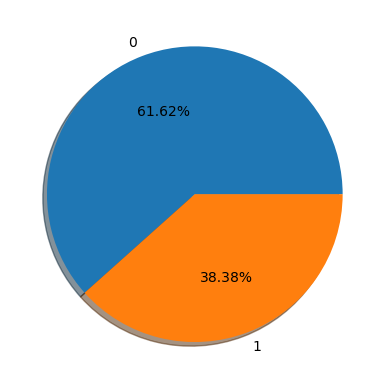%0A)

In \[17\]:

    data['Sex'].unique() 

Out\[17\]:

    array(['male', 'female'], dtype=object)

In \[18\]:

    data['Sex'].value_counts()

Out\[18\]:

    male      577
    female    314
    Name: Sex, dtype: int64

In \[19\]:

    labels = 'Male','Female'
    fig, ax = plt.subplots()
    ax.pie(data['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
    plt.show()

![](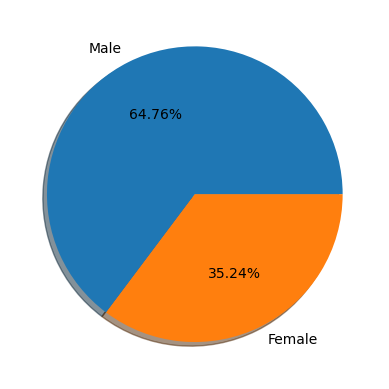%0A)

In \[20\]:

    data['Pclass'].unique() 

Out\[20\]:

    array([3, 1, 2], dtype=int64)

In \[21\]:

    data['Pclass'].value_counts()

Out\[21\]:

    3    491
    1    216
    2    184
    Name: Pclass, dtype: int64

In \[22\]:

    labels = '3','1','2'
    fig, ax = plt.subplots()
    ax.pie(data['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
    plt.show()

![](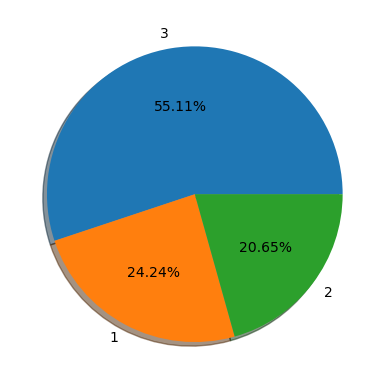%0A)

In \[23\]:

    data['Embarked'].unique() 

Out\[23\]:

    array(['S', 'C', 'Q', nan], dtype=object)

In \[24\]:

    data['Embarked'].isnull().sum()

Out\[24\]:

    2

In \[25\]:

    data.loc[pd.isna(data["Embarked"]), :].index

Out\[25\]:

    Int64Index([61, 829], dtype='int64')

In \[26\]:

    data.drop([61,829],inplace=True)

In \[27\]:

    data.shape

Out\[27\]:

    (889, 11)

In \[28\]:

    data.reset_index(drop=True,inplace = True)

In \[29\]:

    data['Embarked'].isnull().sum()

Out\[29\]:

    0

all null value removed from embarked

In \[30\]:

    data['Embarked'].value_counts()

Out\[30\]:

    S    644
    C    168
    Q     77
    Name: Embarked, dtype: int64

In \[31\]:

    labels = 'S','C','Q'
    fig, ax = plt.subplots()
    ax.pie(data['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
    plt.show()

![](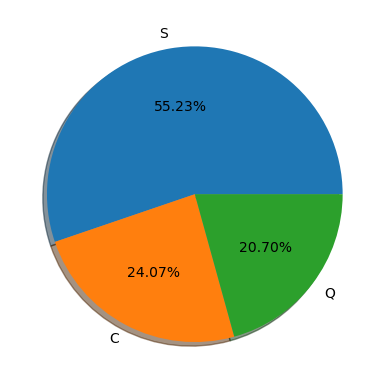%0A)

In \[32\]:

    data['Sex'] = data.Sex.map({'female':0,'male':1})

In \[33\]:

    dumm = pd.get_dummies(data['Embarked'],drop_first = False)

In \[34\]:

    dumm

Out\[34\]:

|     | C   | Q   | S   |
|-----|-----|-----|-----|
| 0   | 0   | 0   | 1   |
| 1   | 1   | 0   | 0   |
| 2   | 0   | 0   | 1   |
| 3   | 0   | 0   | 1   |
| 4   | 0   | 0   | 1   |
| ... | ... | ... | ... |
| 884 | 0   | 0   | 1   |
| 885 | 0   | 0   | 1   |
| 886 | 0   | 0   | 1   |
| 887 | 1   | 0   | 0   |
| 888 | 0   | 1   | 0   |

889 rows × 3 columns

In \[35\]:

    data = data.join(dumm)

In \[36\]:

    data.drop(columns = ['Embarked'],axis = 1, inplace = True)

In \[37\]:

    data

Out\[37\]:

|     | PassengerId | Survived | Pclass | Name                                              | Sex | Age  | SibSp | Parch | Ticket           | Fare    | C   | Q   | S   |
|-----|-------------|----------|--------|---------------------------------------------------|-----|------|-------|-------|------------------|---------|-----|-----|-----|
| 0   | 1           | 0        | 3      | Braund, Mr. Owen Harris                           | 1   | 22.0 | 1     | 0     | A/5 21171        | 7.2500  | 0   | 0   | 1   |
| 1   | 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | 0   | 38.0 | 1     | 0     | PC 17599         | 71.2833 | 1   | 0   | 0   |
| 2   | 3           | 1        | 3      | Heikkinen, Miss. Laina                            | 0   | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250  | 0   | 0   | 1   |
| 3   | 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | 0   | 35.0 | 1     | 0     | 113803           | 53.1000 | 0   | 0   | 1   |
| 4   | 5           | 0        | 3      | Allen, Mr. William Henry                          | 1   | 35.0 | 0     | 0     | 373450           | 8.0500  | 0   | 0   | 1   |
| ... | ...         | ...      | ...    | ...                                               | ... | ...  | ...   | ...   | ...              | ...     | ... | ... | ... |
| 884 | 887         | 0        | 2      | Montvila, Rev. Juozas                             | 1   | 27.0 | 0     | 0     | 211536           | 13.0000 | 0   | 0   | 1   |
| 885 | 888         | 1        | 1      | Graham, Miss. Margaret Edith                      | 0   | 19.0 | 0     | 0     | 112053           | 30.0000 | 0   | 0   | 1   |
| 886 | 889         | 0        | 3      | Johnston, Miss. Catherine Helen "Carrie"          | 0   | NaN  | 1     | 2     | W./C. 6607       | 23.4500 | 0   | 0   | 1   |
| 887 | 890         | 1        | 1      | Behr, Mr. Karl Howell                             | 1   | 26.0 | 0     | 0     | 111369           | 30.0000 | 1   | 0   | 0   |
| 888 | 891         | 0        | 3      | Dooley, Mr. Patrick                               | 1   | 32.0 | 0     | 0     | 370376           | 7.7500  | 0   | 1   | 0   |

889 rows × 13 columns

In \[38\]:

    data.drop(columns = ['Ticket'],inplace = True)

In \[39\]:

    data

Out\[39\]:

|     | PassengerId | Survived | Pclass | Name                                              | Sex | Age  | SibSp | Parch | Fare    | C   | Q   | S   |
|-----|-------------|----------|--------|---------------------------------------------------|-----|------|-------|-------|---------|-----|-----|-----|
| 0   | 1           | 0        | 3      | Braund, Mr. Owen Harris                           | 1   | 22.0 | 1     | 0     | 7.2500  | 0   | 0   | 1   |
| 1   | 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | 0   | 38.0 | 1     | 0     | 71.2833 | 1   | 0   | 0   |
| 2   | 3           | 1        | 3      | Heikkinen, Miss. Laina                            | 0   | 26.0 | 0     | 0     | 7.9250  | 0   | 0   | 1   |
| 3   | 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | 0   | 35.0 | 1     | 0     | 53.1000 | 0   | 0   | 1   |
| 4   | 5           | 0        | 3      | Allen, Mr. William Henry                          | 1   | 35.0 | 0     | 0     | 8.0500  | 0   | 0   | 1   |
| ... | ...         | ...      | ...    | ...                                               | ... | ...  | ...   | ...   | ...     | ... | ... | ... |
| 884 | 887         | 0        | 2      | Montvila, Rev. Juozas                             | 1   | 27.0 | 0     | 0     | 13.0000 | 0   | 0   | 1   |
| 885 | 888         | 1        | 1      | Graham, Miss. Margaret Edith                      | 0   | 19.0 | 0     | 0     | 30.0000 | 0   | 0   | 1   |
| 886 | 889         | 0        | 3      | Johnston, Miss. Catherine Helen "Carrie"          | 0   | NaN  | 1     | 2     | 23.4500 | 0   | 0   | 1   |
| 887 | 890         | 1        | 1      | Behr, Mr. Karl Howell                             | 1   | 26.0 | 0     | 0     | 30.0000 | 1   | 0   | 0   |
| 888 | 891         | 0        | 3      | Dooley, Mr. Patrick                               | 1   | 32.0 | 0     | 0     | 7.7500  | 0   | 1   | 0   |

889 rows × 12 columns

In \[40\]:

    sns.boxplot(data['Age'])

Out\[40\]:

    <Axes: >

![](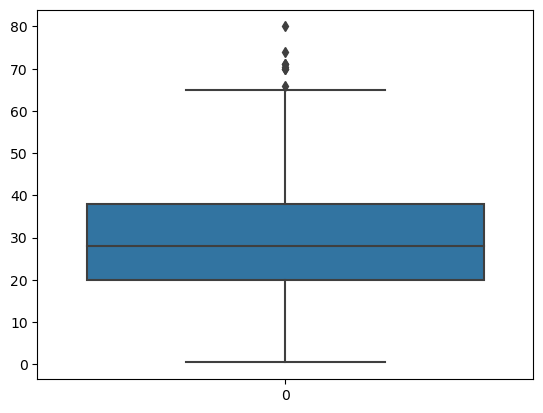%0A)

imputing missing data

In \[41\]:

    from sklearn.impute import KNNImputer
    imp = KNNImputer(n_neighbors=2)
    Data_new= data.copy()

In \[43\]:

    Data_new = imp.fit_transform(Data_new[['Sex','Age']])

In \[44\]:

    Data_new

Out\[44\]:

    array([[ 1., 22.],
           [ 0., 38.],
           [ 0., 26.],
           ...,
           [ 0., 32.],
           [ 1., 26.],
           [ 1., 32.]])

In \[45\]:

    type(Data_new)

Out\[45\]:

    numpy.ndarray

In \[46\]:

    Data_new = pd.DataFrame(Data_new, columns=['Sex','Age'])

In \[47\]:

    Data_new.index = data.index

In \[48\]:

    data[['Age','Sex']] = Data_new[['Age','Sex']]

In \[49\]:

    data['Age'].isnull().sum()

Out\[49\]:

    0

correlation

In \[50\]:

    t_corr = data.corr()
    t_corr

Out\[50\]:

|             | PassengerId | Survived  | Pclass    | Sex       | Age       | SibSp     | Parch     | Fare      | C         | Q         | S         |
|-------------|-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| PassengerId | 1.000000    | -0.005028 | -0.035330 | 0.043136  | 0.027237  | -0.057686 | -0.001657 | 0.012703  | -0.001208 | -0.033694 | 0.022269  |
| Survived    | -0.005028   | 1.000000  | -0.335549 | -0.541585 | -0.061387 | -0.034040 | 0.083151  | 0.255290  | 0.169966  | 0.004536  | -0.151777 |
| Pclass      | -0.035330   | -0.335549 | 1.000000  | 0.127741  | -0.327795 | 0.081656  | 0.016824  | -0.548193 | -0.245733 | 0.220558  | 0.076466  |
| Sex         | 0.043136    | -0.541585 | 0.127741  | 1.000000  | 0.065452  | -0.116348 | -0.247508 | -0.179958 | -0.084520 | -0.075217 | 0.121405  |
| Age         | 0.027237    | -0.061387 | -0.327795 | 0.065452  | 1.000000  | -0.225819 | -0.173839 | 0.091212  | 0.034131  | -0.004313 | -0.027190 |
| SibSp       | -0.057686   | -0.034040 | 0.081656  | -0.116348 | -0.225819 | 1.000000  | 0.414542  | 0.160887  | -0.060074 | -0.026692 | 0.069438  |
| Parch       | -0.001657   | 0.083151  | 0.016824  | -0.247508 | -0.173839 | 0.414542  | 1.000000  | 0.217532  | -0.011588 | -0.081585 | 0.061512  |
| Fare        | 0.012703    | 0.255290  | -0.548193 | -0.179958 | 0.091212  | 0.160887  | 0.217532  | 1.000000  | 0.270731  | -0.116684 | -0.163758 |
| C           | -0.001208   | 0.169966  | -0.245733 | -0.084520 | 0.034131  | -0.060074 | -0.011588 | 0.270731  | 1.000000  | -0.148646 | -0.782613 |
| Q           | -0.033694   | 0.004536  | 0.220558  | -0.075217 | -0.004313 | -0.026692 | -0.081585 | -0.116684 | -0.148646 | 1.000000  | -0.499261 |
| S           | 0.022269    | -0.151777 | 0.076466  | 0.121405  | -0.027190 | 0.069438  | 0.061512  | -0.163758 | -0.782613 | -0.499261 | 1.000000  |

In \[51\]:

    plt.figure
    sns.heatmap(t_corr,annot=True,linewidth=1)
    plt.show()

![](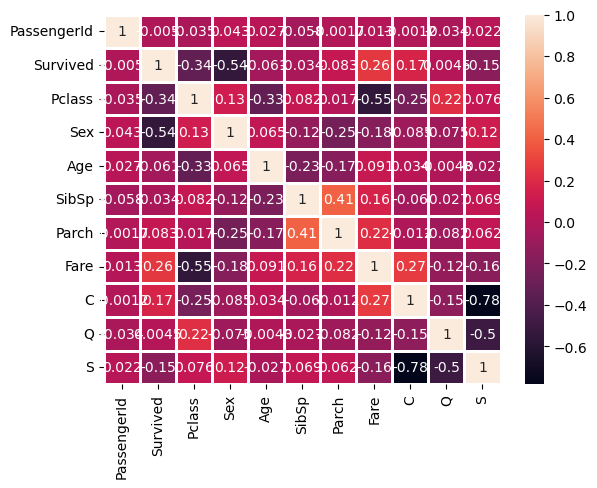%0A)

# correlation of feature columns with label column<a href="#correlation-of-feature-columns-with-label-column"
class="anchor-link">¶</a>

In \[52\]:

    plt.figure(figsize = (20,8))
    data.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'c')
    plt.xlabel('Features',fontsize=15)
    plt.ylabel('Survived',fontsize=15)
    plt.title('correlation',fontsize = 18)
    plt.show()

![](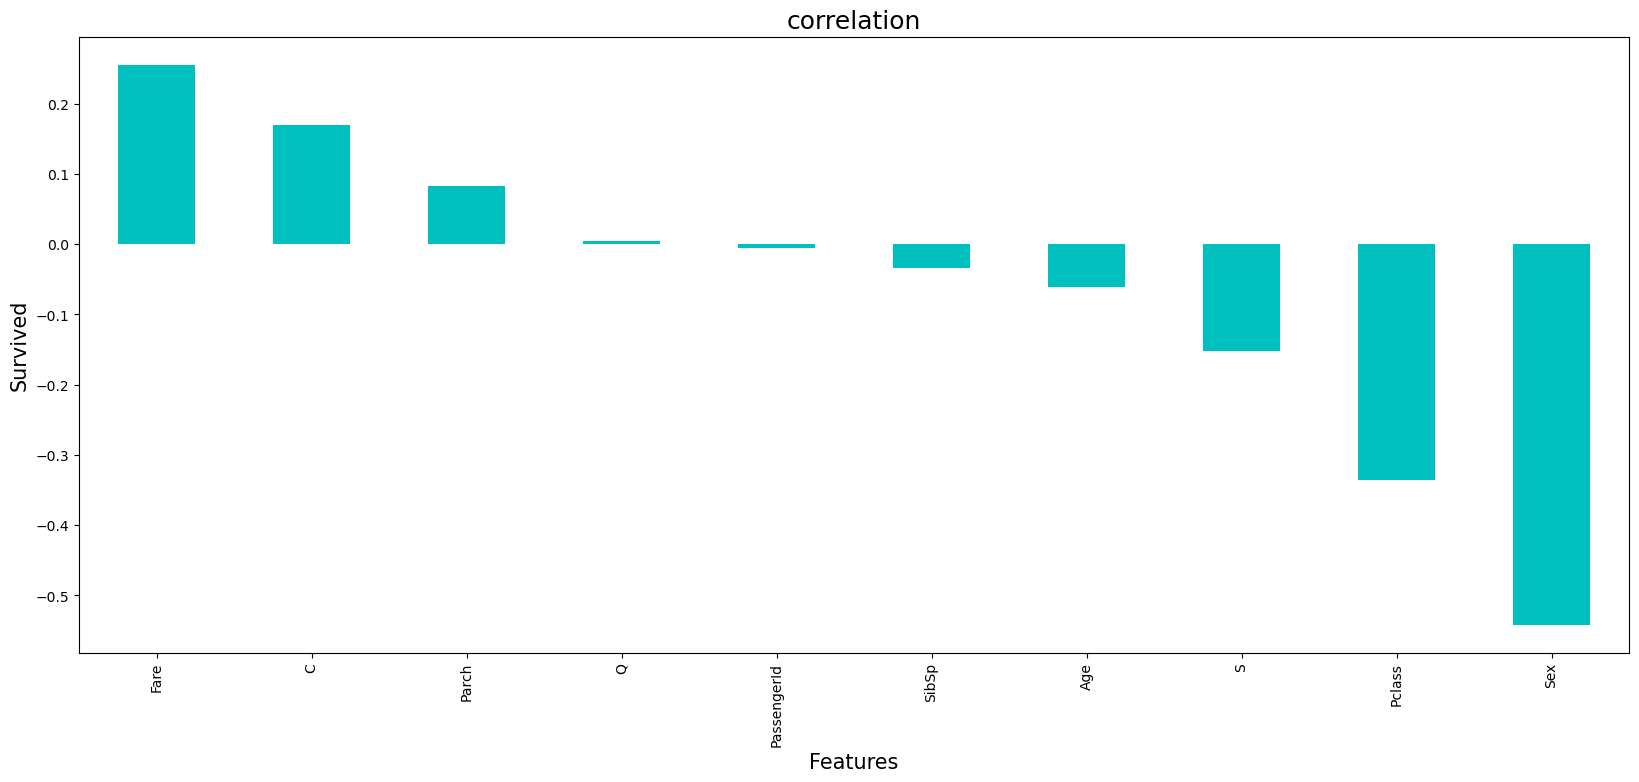%0A)

In \[53\]:

    X = data.drop(columns = ['Survived'])
    y = data['Survived']

# Interpreting Relationship between Dependent Variable and Independent Variables<a
href="#Interpreting-Relationship-between-Dependent-Variable-and-Independent-Variables"
class="anchor-link">¶</a>

In \[ \]:

    plt.figure(figsize=(20,25),facecolor='white')
    plotnum=1
    y = data['Survived']
    X = data[['Age','Fare']]
    for col in X:
        if plotnum<=23:
            plt.subplot(5,5,plotnum)
            sns.barplot(y,X[col])
            plt.xlabel('Survived',fontsize=20)
            plt.ylabel(col,fontsize=20)
        plotnum+=1
    plt.tight_layout()

In \[ \]:

    plt.figure(figsize=(20,25),facecolor='white')
    plotnum=1
    y = data['Survived']
    X = data.drop(columns=['Survived','Age','Fare'])
    for col in X:
        if plotnum<=23:
            plt.subplot(5,5,plotnum)
            sns.barplot(y,X[col])
            plt.xlabel('Survived',fontsize=20)
            plt.ylabel(col,fontsize=20)
        plotnum+=1
    plt.tight_layout()

In \[ \]:

    data['Families'] = data['Parch']+data['SibSp']

In \[ \]:

    data['Families']

In \[ \]:

    sns.countplot(y, hue =data['Families'])

In \[ \]:

    data.drop(columns=['SibSp','Parch'],inplace=True )

In \[ \]:

    sns.countplot(y, hue =data['Sex'])

In \[ \]:

    sns.barplot(x =data['Survived'],y = data['Age'], hue = data['Sex'])

In \[ \]:

    data

# Handling outlier<a href="#Handling-outlier" class="anchor-link">¶</a>

In \[ \]:

    X = data.drop(columns = ['Survived'])
    y = data['Survived']

In \[ \]:

    plt.figure(figsize=(20,25),facecolor='white')
    plotnum=1
    feat= ['Age','Fare']
    for col in X[feat]:
        if plotnum<=11:
            plt.subplot(4,4,plotnum)
            sns.boxplot(X[col])
            plt.xlabel(col,fontsize=20)
        plotnum+=1
    plt.show()

# Remove outlier<a href="#Remove-outlier" class="anchor-link">¶</a>

In \[ \]:

    df2 = X[feat].copy()

In \[ \]:

    from scipy.stats import zscore
    zscor = zscore(df2)
    z_score_abs = np.abs(zscor)

    df3 = df2[(z_score_abs < 3).all(axis=1)]

In \[ \]:

    df3.shape

In \[ \]:

    df2.shape

# check loss%<a href="#check-loss%25" class="anchor-link">¶</a>

In \[ \]:

    loss = (889-862)/889*100

In \[ \]:

    loss

In \[1\]:

    #REMOVE OUTLIER

In \[ \]:

    df =X[feat].copy()

In \[ \]:

    indxdrop = np.array([])
    for colm in df:
        q1 = df[colm].quantile(0.25)
        q3 = df[colm].quantile(0.75)
        iqr = q3-q1
        upperval = q3 + (1.5*iqr)
        lowerval = q1 - (1.5*iqr)
        col = df[colm]
        indx = col[(col > upperval) | (col < lowerval)].index
        indxdrop = np.append(indxdrop, indx)

In \[ \]:

    indxdrop 

In \[ \]:

    df = df.drop(indxdrop)

In \[ \]:

    df.shape

In \[ \]:

    loss=(889-721)/889 * 100
    loss

In \[3\]:

    # REDUCE OUTLIER

In \[ \]:

    dropindx = X.index.difference(df3.index)

In \[ \]:

    dropindx

In \[ \]:

    data.drop(dropindx,inplace = True) 

In \[ \]:

    X = data.drop(columns = ['Survived'])
    y = data['Survived']

In \[ \]:

    X.isnull().sum()

In \[ \]:

    plt.figure(figsize=(20,25),facecolor='white')
    plotnum=1
    feat= ['Age','Fare']
    for col in X[feat]:
        if plotnum<=11:
            plt.subplot(4,4,plotnum)
            sns.boxplot(X[col])
            plt.xlabel(col,fontsize=20)
        plotnum+=1
    plt.show()

In \[5\]:

    #NORMALIZING DATA DISTRIBUTION

In \[ \]:

    X[feat].skew()

In \[ \]:

    (X[feat]==0).sum()

# KNN<a href="#KNN" class="anchor-link">¶</a>

In \[ \]:

    imp = KNNImputer(n_neighbors=2)

In \[ \]:

    X_filled = X.copy()

In \[ \]:

    X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])

In \[ \]:

    X_filled

In \[ \]:

    type(X_filled)

In \[7\]:

    #to convert numpy array back into dataframe

In \[ \]:

    X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare']) 

In \[ \]:

    X_filled.index = X.index

In \[ \]:

    X[['Pclass','Fare']] = X_filled[['Pclass','Fare']]

In \[ \]:

    X['Fare'].isnull().sum()

In \[ \]:

    X.skew()

In \[8\]:

    #Reducing skewness further using PowerTransformer

In \[9\]:

    from sklearn.preprocessing import PowerTransformer

In \[ \]:

    powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
    df4 = X[['Fare','Families']]
    transformed= powtrans.fit_transform(df4)
    transformed = pd.DataFrame(transformed, columns=df4.columns) 
    transformed.skew()

In \[ \]:

    transformed.index = X.index
    X[['Fare','Families']] = transformed[['Fare','Families']]
    X.skew()

In \[ \]:

    X.isnull().sum()

In \[ \]:

    plt.figure(figsize=(20,25),facecolor='white')
    plotnum=1
    for col in X:
        if plotnum<=10:
            plt.subplot(4,4,plotnum)
            sns.distplot(X[col])
            plt.xlabel(col,fontsize=20)
        plotnum+=1
    plt.show()

In \[10\]:

    #FEATURE SELECTION

In \[ \]:

    from sklearn.preprocessing import StandardScaler
    scaler= StandardScaler()
    scaled_X = scaler.fit_transform(X)
    scaled_X

In \[12\]:

    #Checking for Multicollinearity using Variance Inflation Factor

In \[13\]:

    from statsmodels.stats.outliers_influence import variance_inflation_factor

In \[ \]:

    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
    vif

In \[14\]:

    #Selecting Kbest Features

In \[ \]:

    from sklearn.feature_selection import SelectKBest, f_classif
    bestfeat = SelectKBest(score_func = f_classif, k = 8)
    fit = bestfeat.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    fit = bestfeat.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    dfcolumns.head()
    featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
    featureScores.columns = ['Feature', 'Score']
    print(featureScores.nlargest(11,'Score'))

In \[15\]:

    #Buidling classification model

In \[16\]:

    from sklearn.model_selection import train_test_split

In \[ \]:

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    maxAcc = 0
    maxRS=0
    for i in range(1,100):
        x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i,stratify = y)
        modRF =  RandomForestClassifier()
        modRF.fit(x_train,y_train)
        pred = modRF.predict(x_test)
        acc  = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc=acc
            maxRS=i
    print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

In \[ \]:

    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, stratify = y,random_state = 16) 

In \[ \]:

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import plot_roc_curve
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier

In \[ \]:

    DTC = DecisionTreeClassifier()
    RFC = RandomForestClassifier()
    LOGR= LogisticRegression(solver='liblinear')
    SV =  SVC()
    KNN = KNeighborsClassifier()

In \[19\]:

    #TRAINING THE MODEL

In \[ \]:

    DTC.fit(x_train,y_train)
    RFC.fit(x_train,y_train)
    SV.fit(x_train,y_train)
    LOGR.fit(x_train,y_train)
    KNN.fit(x_train,y_train)

In \[22\]:

    #Decision Tree Classifier Model Accuracy

In \[ \]:

    DTCpred = DTC.predict(x_test)
    accu = classification_report(y_test,DTCpred)
    conf_matrx = confusion_matrix(y_test,DTCpred)
    conf_matrx

In \[ \]:

    print(accu)

In \[23\]:

    #Logistic Regression Model Accuracy

In \[ \]:

    LOGRpred = LOGR.predict(x_test)
    accu = classification_report(y_test,LOGRpred)
    conf_matrx = confusion_matrix(y_test,LOGRpred)
    conf_matrx

In \[ \]:

    print(accu)

In \[24\]:

    #Random Forest Classifier Model Accuracy

In \[ \]:

    RFCpred = RFC.predict(x_test)
    accu = classification_report(y_test,RFCpred)
    conf_matrx = confusion_matrix(y_test,RFCpred)
    conf_matrx

In \[ \]:

    print(accu)

In \[25\]:

    #SV Classifier Model Accuracy

In \[ \]:

    SVpred = SV.predict(x_test)
    accu = classification_report(y_test,SVpred)
    conf_matrx = confusion_matrix(y_test,SVpred)
    conf_matrx

In \[ \]:

    print(accu)

In \[26\]:

    #K Nearest Neighbours Classifier Model Accuracy

In \[ \]:

    KNNpred = KNN.predict(x_test)
    accu = classification_report(y_test,KNNpred)
    conf_matrx = confusion_matrix(y_test,KNNpred)
    conf_matrx

In \[ \]:

    print(accu)

# CROSS VALIDATION<a href="#CROSS-VALIDATION" class="anchor-link">¶</a>

In \[27\]:

    from sklearn.model_selection import cross_val_score as cvs

In \[ \]:

    # Decision Tree Classifier
    print(cvs(DTC,scaled_X,y,cv=5).mean())  

    #Logistic Regression
    print(cvs(LOGR,scaled_X,y,cv=5).mean()) 

    #Random Forest Classifier
    print(cvs(RFC,scaled_X,y,cv=5).mean())

    #SV Classifier
    print(cvs(SV,scaled_X,y,cv=5).mean())

In \[ \]:

    #K Nearest Neighbours Classifier
    print(cvs(KNN,scaled_X,y,cv=5).mean())

# ROC AUC Scores<a href="#ROC-AUC-Scores" class="anchor-link">¶</a>

In \[ \]:

    #Decision Tree Classifier
    roc_auc_score(y_test,DTCpred)

    #Logistic Regression
    roc_auc_score(y_test,LOGRpred)

    #Random Forest Classifier
    roc_auc_score(y_test,RFCpred)

    #SV Classifier
    roc_auc_score(y_test,SVpred)
    #K Nearest Neighbours Classifier
    roc_auc_score(y_test,KNNpred)

In \[28\]:

    #Random Forest Classifier is the best model 

In \[29\]:

    #ROC AUC curves

In \[ \]:

    disp = plot_roc_curve(DTC,x_test,y_test)
    mod = [LOGR,RFC,SV,KNN]
    for i in mod:
        plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
    plt.legend(prop={'size':10}, loc = 'lower right')
    plt.show()

In \[30\]:

    #Hyper Parameter Tunin

In \[31\]:

    from sklearn.model_selection import GridSearchCV

In \[ \]:

    #Random Forest Classifier
    parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
    GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
    GridCV.fit(x_train,y_train)

In \[ \]:

    GridCV.best_params_

In \[ \]:

    Best_mod1 = RandomForestClassifier(n_estimators = 60,criterion = 'gini', max_depth= 10, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 2)
    Best_mod1.fit(x_train,y_train)
    rfpred = Best_mod1.predict(x_test)
    acc = accuracy_score(y_test,rfpred)
    print(acc*100)

In \[ \]:

    conf_matrx = confusion_matrix(y_test,rfpred)
    conf_matrx

In \[ \]:

    cr = classification_report(y_test,rfpred)
    print(cr)

In \[ \]:

    import joblib
    joblib.dump(Best_mod1,"BestModelTitanic.pkl")

    Loading The Model
    mod=joblib.load("BestModelTitanic.pkl")
    print(mod.predict(x_test))